# Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the dataset

In [5]:
data=pd.read_csv('StudentsPerformance.csv')
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


# 1.) Find out how many males and females participated in the test 

In [6]:
data['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

C:\Users\Thinkpad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


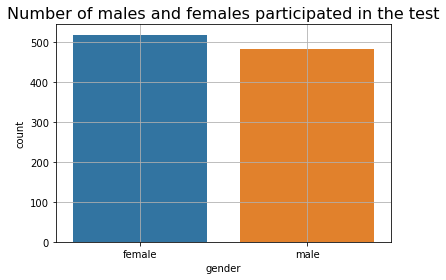

In [7]:
plt.title("Number of males and females participated in the test",fontsize=16)
sns.countplot(data['gender'])
plt.grid()
plt.show()

# 2.) What do you think about the students' parental level of education

In [8]:
data['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

C:\Users\Thinkpad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


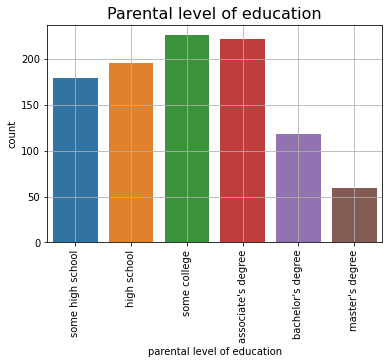

In [9]:
plt.title("Parental level of education",fontsize=16)
sns.countplot(data['parental level of education'])
plt.xticks(rotation=90)
plt.grid()
plt.show()

The majority of parents have some college education, and the second most common education is an associate's degree.Only a few of them have a master's degree.

In [11]:
# Finding the average scores of students based on parental level of education
par_edu=data.groupby('parental level of education')[['math score','reading score','writing score']].mean()
par_edu

,math score,reading score,writing score
parental level of education,,,
associate's degree,67.977477,71.018018,70.031532
bachelor's degree,69.288136,73.000000,73.381356
high school,61.821429,64.602041,62.403061
master's degree,70.254237,75.949153,75.677966
some college,67.128319,69.566372,69.035398
some high school,63.134078,66.759777,64.888268


# 3.) Who scores the most on average for math, reading and writing based on

# -Gender

In [15]:
data[['gender','math score','reading score','writing score']].groupby('gender').mean()

,math score,reading score,writing score
gender,,,
female,63.376448,72.590734,72.467181
male,68.821577,65.545643,63.446058


 Male students scored high in math score. Whereas, female students scored high in reading and writing scores.

#  -Test preparation course

In [16]:
data[['test preparation course','math score','reading score','writing score']].groupby('test preparation course').mean()

,math score,reading score,writing score
test preparation course,,,
completed,69.96648,74.175978,74.684358
none,63.78972,66.417445,64.457944


 Students who completed the test preparation course performed better compared to others.

# 4.) What do you think about the scoring variation for math, reading and writing

# -based on gender

In [18]:
data[['gender','math score','reading score','writing score']].groupby('gender').var()

,math score,reading score,writing score
gender,,,
female,256.958593,207.677438,220.369327
male,211.889097,200.211010,202.413924


The variation in math, reading and writing scores is higher for female students. Therefore, it is clear that male students are more consistent in scoring in all three subject tests.

# -based on test preparation course

In [19]:
data[['test preparation course','math score','reading score','writing score']].groupby('test preparation course').var()

,math score,reading score,writing score
test preparation course,,,
completed,210.884027,183.265864,175.202612
none,246.668662,213.419851,226.251739


 The variation value is lower for those who completed the test preparation course than for those who didn't. 

# 5.) Giving bonus points to top 25% of students based on their math score

In [20]:
math_top=data.nlargest(250,'math score')
math_top

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
515,female,group E,some college,standard,none,100,92,97
516,female,group E,bachelor's degree,standard,none,100,100,100
517,female,group E,associate's degree,standard,none,100,100,100
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
...,...,...,...,...,...,...,...,...
428,female,group D,some college,free/reduced,none,77,86,86
429,female,group E,some high school,standard,none,77,79,80
849,male,group A,bachelor's degree,standard,none,77,67,68
850,male,group C,associate's degree,free/reduced,none,77,67,64


These 250 students(25% of 1000 students) will get the bonus points